<h1> Spam Detection

In [3]:
# lobrary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

D:\anaconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\anaconda\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
D:\anaconda\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
data = pd.read_csv('sms_spam_collection.csv')
data.head(3)

,Unnamed: 0,label,message
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [5]:
data['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

<h2> Text processing

Method :
1. converting to lower case
1. contraction
1. remove or convert number into text
1. remove punctuation
1. remove white spaces
1. remove stopwords and particular words

<h3> Lower

In [6]:
# To lower
def lower(text):
    return text.lower()
lower('APAPAPAPAPA')

'apapapapapa'

<h3>Expand Contraction

In [7]:
contractions_dict = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he shall",
"he'll've": "he shall have",
"he's": "he has",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I shall",
"I'll've": "I shall have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it shall",
"it'll've": "it shall have",
"it's": "it has",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she shall",
"she'll've": "she shall have",
"she's": "she has",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that has",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there has",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they shall",
"they'll've": "they shall have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall",
"what'll've": "what shall have",
"what're": "what are",
"what's": "what has",
"what've": "what have",
"when's": "when has",
"when've": "when have",
"where'd": "where did",
"where's": "where has",
"where've": "where have",
"who'll": "who shall",
"who'll've": "who shall have",
"who's": "who has",
"who've": "who have",
"why's": "why has",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [8]:

def expand_contractions(text, contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) \
            if contractions_dict.get(match) \
            else contractions_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def main_contraction(text):
    text = expand_contractions(text, contractions_dict)
    return text

In [9]:
text_2 = "If ain't got you"
main_contraction(text_2)

'If am not got you'

<h3> Remove number

In [11]:
def remove_num(text):
    output = ''.join(i for i in text if not i.isdigit() )
    return output

In [14]:
text_string = "indonesia 17agustus 1945"
text_string = remove_num(text_string)
print(text_string)

indonesia agustus 


<h3> Remove Punctuation

In [33]:
from string import punctuation

In [35]:
def remove_punc(text):
    return ''.join(i for i in text if i not in punctuation)

In [36]:
text_2 = 'dwiki, aca, ucok, kimi'
text_2 = remove_punc(text_2)
print(text_2)

dwiki aca ucok kimi


<h3> Remove white space

In [16]:
def remove_ws(text):
    return ' '.join(text.split())

In [17]:
text_2 = 'apollo      launch  at 1989'
text_2 = remove_ws(text_2)
print(text_2)

apollo launch at 1989


<h3> Removing Stop Words </h3>
- Using NLTK corpus

In [18]:
import nltk
from nltk.corpus import stopwords

In [19]:
stopwords.words('english').index('from')

87

In [20]:
len(stopwords.words('indonesian'))

758

In [44]:
def remove_sw(sentence):
    stop_words = stopwords.words('english')
    return ' '.join([w for w in nltk.word_tokenize(sentence) if not w in stop_words])

In [45]:
text_string = "There was dwiki, aca, ucok and kimi kyah"
text_string = remove_sw(text_string)
print(text_string)

There dwiki , aca , ucok kimi kyah


In [40]:
nltk.word_tokenize(text_string)

['There', 'dwiki', ',', 'aca', ',', 'ucok', 'kimi', 'kyah']

<h2> Processing

In [32]:
data.columns

Index(['Unnamed: 0', 'label', 'message'], dtype='object')

In [46]:
data['sms_prep1'] = data['message'].apply(lower)
data['sms_prep2'] = data['sms_prep1'].apply(main_contraction)
data['sms_prep3'] = data['sms_prep2'].apply(remove_num)
data['sms_prep4'] = data['sms_prep3'].apply(remove_punc)
data['sms_prep5'] = data['sms_prep4'].apply(remove_ws)
data['sms_prep'] = data['sms_prep5'].apply(remove_sw)

data[['label','message','sms_prep']]

,label,message,sms_prep
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,nd time tried contact u u £ pound prize claim ...
5568,ham,Will ü b going to esplanade fr home?,ü b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood soany suggestions
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...


<h3> Stemming and lemmetize</h3>

- Stemming increases recall while harming precision
- Lemmatize increase precision and harshing recall

In [47]:
from nltk.stem import SnowballStemmer 

In [57]:
stem = SnowballStemmer('english')

def steming(text):
    stem_word = [stem.stem(word) for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(text)]
    return ' '.join(stem_word)

In [58]:
text_test ='I am reading a book and the book is very fascinating'
steming(text_test)

'i am read a book and the book is veri fascin'

In [59]:
from nltk.stem import WordNetLemmatizer

In [68]:
lemma = WordNetLemmatizer()

def lem(text):
    lem_word = [lemma.lemmatize(word) for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(text)]
    return ' '.join(lem_word)

In [70]:
text_test ='I saw eighteen mice today!' 
lem(text_test)

'I saw eighteen mouse today !'

In [72]:
data['sms_stem'] = data['sms_prep'].apply(steming)
data['sms_lem'] = data['sms_prep'].apply(lem)

<h3> Modelling

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import plot_confusion_matrix

In [74]:
text = data['sms_lem']
y = np.where(data['label'] == 'spam', 1,0)

In [75]:
text_train, text_test, y_train, y_test = train_test_split(text, y, test_size=.2)

In [82]:
vector = CountVectorizer().fit(text_train)
x_train = vector.transform(text_train)
x_test = vector.transform(text_test)

<h3> Naive Bayes

In [83]:
spam_detectorNB = Pipeline([
    ('cvt', CountVectorizer(ngram_range=(1,2))),
    ('nb', MultinomialNB())
])

In [85]:
spam_detectorNB.fit(text_train, y_train)

Pipeline(steps=[('cvt', CountVectorizer(ngram_range=(1, 2))),
                ('nb', MultinomialNB())])

In [86]:
y_predNB = spam_detectorNB.predict(text_test)

In [87]:
print(classification_report(y_test, y_predNB))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       964
           1       0.97      0.92      0.95       151

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



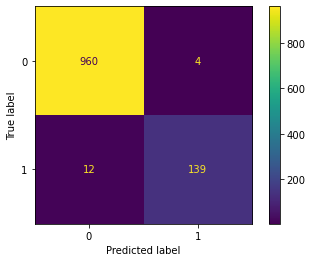

In [88]:
plot_confusion_matrix(spam_detectorNB, text_test, y_test)

<h3>Hyper Param